# 第5回: 課題レポート（参考）
作成日：2025/6/23 
作成者：相澤宏旭  

この課題レポートは参考例です．Jupyter Notebookを用いて作成しました．作成方法はGoogle Colab，Markdown，VSCode，TeXなど指定はしませんが，課題内容と解答がわかるように .pdf形式で提出してください．またレポートのフォーマットも指定しません．

---

**課題内容**：  

課題1:  
積分因子法で解く一階線形非同次微分方程式の問題を **一問** 作問せよ．
そして，その問題の解答例を数式とSympyの両方で作成せよ．

課題2:  
定数変化法で解く一階線形非同次微分方程式の問題を **一問** 作問せよ．
そして，その問題の解答例を数式とSympyの両方で作成せよ．


## 課題1の例
**課題1:** 次の微分方程式の一般解を積分因子法で求めよ．

$$
\begin{aligned}
\frac{dy}{dx}+(\sin x)y=\sin x
\end{aligned}
$$

解答

与えられた微分方程式は、次の形の一階線形非同次微分方程式である．ここでは，積分因子法で解く．

積分因子は次のように定義される．

$$
e^{\int p(x) d x}=e^{\int \sin x d x} = e^{-\cos x}
$$

微分方程式の両辺に積分因子をかけると

$$
e^{-\cos x} \frac{d y}{d x}+e^{-\cos x}(\sin x) y=e^{-\cos x} \sin x
$$

左辺は積の積分に書き換えられる．

$$
\frac{d}{d x}\left(y e^{-\cos x}\right)=e^{-\cos x} \sin x
$$

ここで両辺を $x$ で積分する．

$$
\int \frac{d}{d x}\left(y \cdot e^{-\cos x}\right) d x=\int e^{-\cos x} \sin x d x
$$

右辺は置換積分で計算でき，整理すると

$$
\begin{aligned}
y e^{-\cos x}&=e^{-\cos x}+C \\
y &=1+C e^{\cos x}
\end{aligned}
$$

ただし，$C$ は任意定数である．

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Eq(y(x), C1*exp(cos(x)) + 1)

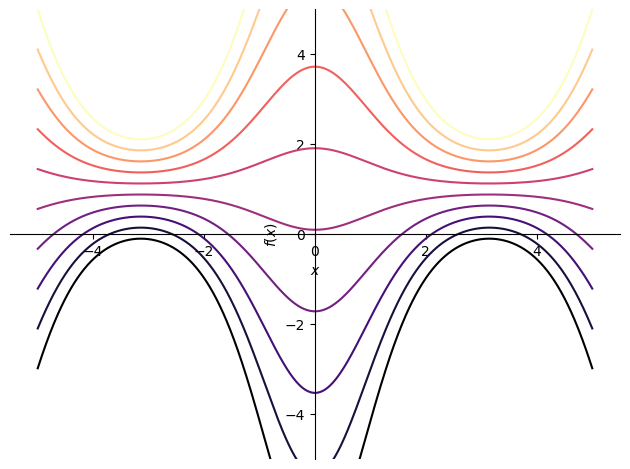

In [ ]:
import numpy as np
from sympy import plotting
import matplotlib.pyplot as plt
from sympy import symbols, Eq, Derivative, Function, dsolve, sin

x = symbols('x')
y = Function('y')(x)
dy = Derivative(y, x)

eq = Eq(dy + sin(x)*y, sin(x))
y_ = dsolve(eq, y)
display(y_)

N = 10

eqs = []
for c in np.linspace(-3, 3, N):
    eqs.append(y_.rhs.subs(symbols('C1'), c))
p = plotting.plot(*eqs, (x, -5, 5), ylim=(-5, 5), show=False)

cm = plt.get_cmap('magma', N)
for i in range(cm.N):
    p[i].line_color = cm(i)
p.show()

## 課題2の例
**課題2:** 次の微分方程式の一般解を定数変化法で求めよ．

$$
\begin{aligned}
\frac{dy}{dx}+\frac{y}{x}=x
\end{aligned}
$$

まず， $\frac{d y}{d x}+\frac{y}{x}=0$ の一般解を考えると，変数分離法より，

$$
y_1=\frac{C_1}{x}
$$

となる．したがって，特殊解を次のように仮定する．

$$
y_2=\frac{C(x)}{x}
$$

$C^{\prime}(x)=q(x) e^{\int p(x) d x}$ より， 

$$
\begin{aligned}
C^{\prime}(x)&=x e^{\int \frac{1}{x} d x} \\
C^{\prime}(x)&=x^2
\end{aligned}
$$

これを $x$ で積分すると，

$$
\begin{aligned}
\int C^{\prime}(x) & =\int x^2 d x \\
C(x) & =\frac{1}{3} x^3+C_2
\end{aligned}
$$

となる．これを仮定した特殊解 $y_2$ に代入すると，
$$
y_2=\frac{\frac{1}{3} x^3+C_2}{x}
$$

となる． 最後に，非同次形の一般解 $y$ は同次形の一般解 $y_1+$ 非同次形の特殊解 $y_2$ だったので
$$
\begin{aligned}
& y=y_1+y_2 \\
& y=\frac{C_1}{x}+\frac{\frac{1}{3} x^3+C_2}{x} \\
& y=\frac{1}{3} x^2+\frac{C}{x}
\end{aligned}
$$

一般解は上式となる． ただし任意定数 $C=C_1+C_2$ としている．

Eq(y(x), (C1 + x**3/3)/x)

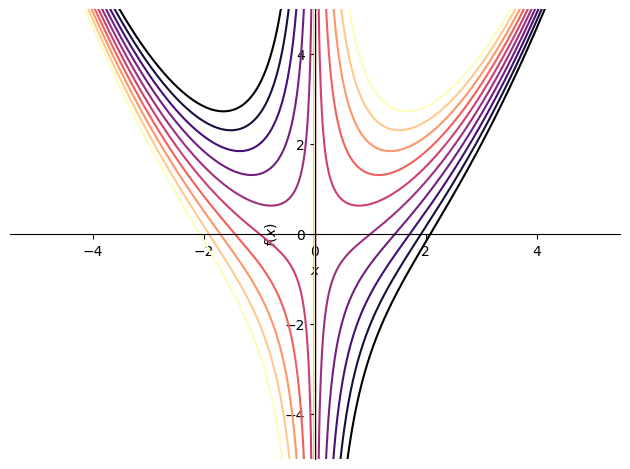

In [ ]:
import numpy as np
from sympy import plotting
import matplotlib.pyplot as plt
from sympy import symbols, Eq, Derivative, Function, dsolve, sin

x = symbols('x')
y = Function('y')(x)
dy = Derivative(y, x)

eq = Eq(dy + y/x, x)
y_ = dsolve(eq, y)
display(y_)

N = 10

eqs = []
for c in np.linspace(-3, 3, N):
    eqs.append(y_.rhs.subs(symbols('C1'), c))
p = plotting.plot(*eqs, (x, -5, 5), ylim=(-5, 5), show=False)

cm = plt.get_cmap('magma', N)
for i in range(cm.N):
    p[i].line_color = cm(i)
p.show()